In [1]:
import pandas as pd
import seaborn as sns 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# --- Global style ---
plt.rcParams.update({
    'font.size': 16,
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titlesize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.4
})

In [6]:
india_imports_china = pd.read_csv(r'C:\Users\Investigador\binu\data\IndiaImportsChinaTotal.csv')
india_exports_china = pd.read_csv(r'C:\Users\Investigador\binu\data\IndiaExportsChinaTotal.csv')
india_imports_world = pd.read_csv(r'C:\Users\Investigador\binu\data\IndiaImportsWorldTotal.csv')

In [7]:
india_imports_china.sort_values('Year', inplace=True)
india_exports_china.sort_values('Year', inplace=True)
india_imports_world.sort_values('Year', inplace=True)

In [8]:
india_exports_china

,ReporterISO3,ProductCode,PartnerISO3,Year,TradeFlowCode,TradeValue in 1000 USD
0,IND,Total,CHN,2003,6,2.567162e+06
1,IND,Total,CHN,2004,6,4.098514e+06
2,IND,Total,CHN,2005,6,7.183792e+06
3,IND,Total,CHN,2006,6,7.829168e+06
4,IND,Total,CHN,2007,6,9.491978e+06
5,IND,Total,CHN,2008,6,1.009393e+07
6,IND,Total,CHN,2009,6,1.037005e+07
7,IND,Total,CHN,2010,6,1.743999e+07
8,IND,Total,CHN,2011,6,1.671779e+07
9,IND,Total,CHN,2012,6,1.472932e+07


In [9]:
combined_df = pd.DataFrame(columns=['Year', 'Imports_China', 'Exports_China', 'Imports_World'])
combined_df['Year'] = india_imports_china['Year']
combined_df['Imports_China'] = india_imports_china['TradeValue in 1000 USD'] / 1000000
combined_df['Exports_China'] = india_exports_china['TradeValue in 1000 USD'] / 1000000
combined_df['Imports_World'] = india_imports_world['TradeValue in 1000 USD'] / 1000000
combined_df['Deficit'] = combined_df['Exports_China'] - combined_df['Imports_China']
combined_df['Export_Import_Ratio'] = combined_df['Exports_China'] / combined_df['Imports_China']
combined_df['Deficit_as_Percent_of_Imports'] = (combined_df['Deficit'] / combined_df['Imports_China']) * 100
combined_df['Trade_Balance_vs_Total_Trade'] = (combined_df['Exports_China'] - combined_df['Imports_China']) / (combined_df['Exports_China'] + combined_df['Imports_China']) * 100 # A more normalized view of imbalance


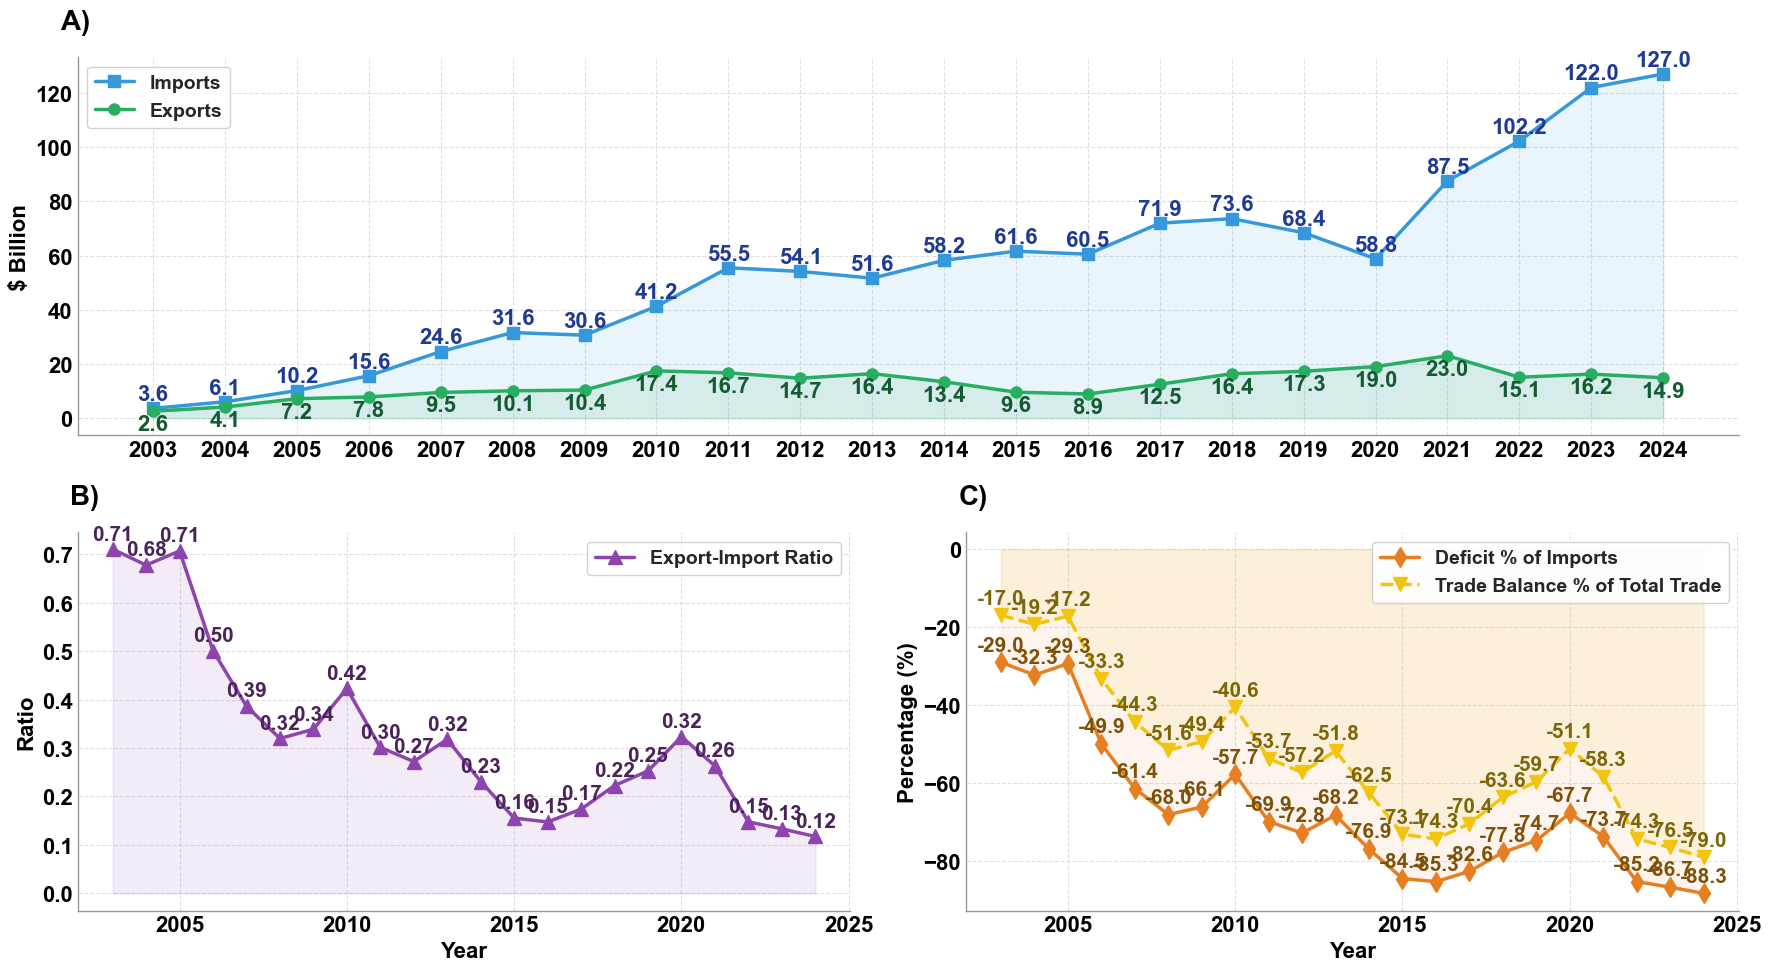

In [11]:
df = combined_df.copy()
# --- Global Style ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.color': 'black',
    'ytick.color': 'black',
    'font.weight': 'bold',
    'axes.labelweight': 'bold'
})

# Labels for subplot titles
labels = ['A', 'B', 'C']
index = 0

def apply_plot_style(ax, xlabel, ylabel, show_xlabel=True):
    global index
    ax.set_title(f"{labels[index]})", fontsize=20, fontweight='bold', color="#000000", loc='left', x=-0.01, pad=20)
    if show_xlabel:
        ax.set_xlabel(xlabel, fontsize=16, color="#000000")
    else:
        ax.set_xlabel("")
    ax.set_ylabel(ylabel, fontsize=16, color="#000000")
    ax.legend(fontsize=14, frameon=True, framealpha=0.9)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.ticklabel_format(style='plain', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#999999')
    index += 1

# --- Plot ---
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2)

# Figure 1 (Top full width)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df['Year'], df['Imports_China'], label='Imports', marker='s', markersize=8, color='#3498db', linewidth=2.5)
ax1.fill_between(df['Year'], df['Imports_China'], color='#3498db', alpha=0.1)
ax1.plot(df['Year'], df['Exports_China'], label='Exports', marker='o', markersize=8, color='#27ae60', linewidth=2.5)
ax1.fill_between(df['Year'], df['Exports_China'], color='#27ae60', alpha=0.1)

for i in range(len(df)):
    ax1.text(df['Year'].iloc[i], df['Imports_China'].iloc[i] + 3,
             f'{df["Imports_China"].iloc[i]:.1f}', fontsize=16, ha='center', color='#1f3a93', fontweight='bold')
    ax1.text(df['Year'].iloc[i], df['Exports_China'].iloc[i] - 7,
             f'{df["Exports_China"].iloc[i]:.1f}', fontsize=16, ha='center', color='#145a32', fontweight='bold')

# Force all x-ticks to show for the top plot
ax1.set_xticks(df['Year'])
apply_plot_style(ax1, 'Year', ' $ Billion ', show_xlabel=False)

# Figure 2 (Bottom-left)
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(df['Year'], df['Export_Import_Ratio'], label='Export-Import Ratio', marker='^', markersize=10, color='#8e44ad', linewidth=2.5)
ax2.fill_between(df['Year'], df['Export_Import_Ratio'], color='#8e44ad', alpha=0.1)
for i in range(len(df)):
    ax2.text(df['Year'].iloc[i], df['Export_Import_Ratio'].iloc[i] + 0.02,
             f'{df["Export_Import_Ratio"].iloc[i]:.2f}', fontsize=15, ha='center', color='#4a235a', fontweight='bold')
apply_plot_style(ax2, 'Year', 'Ratio')
ax2.tick_params(axis='x', rotation=0)

# Figure 3 (Bottom-right)
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(df['Year'], df['Deficit_as_Percent_of_Imports'], label='Deficit % of Imports', marker='d', markersize=10, color='#e67e22', linewidth=2.5)
ax3.plot(df['Year'], df['Trade_Balance_vs_Total_Trade'], label='Trade Balance % of Total Trade', marker='v', markersize=10, color='#f1c40f', linestyle='--', linewidth=2.5)
ax3.fill_between(df['Year'], df['Deficit_as_Percent_of_Imports'], color='#e67e22', alpha=0.08)
ax3.fill_between(df['Year'], df['Trade_Balance_vs_Total_Trade'], color='#f1c40f', alpha=0.08)

for i in range(len(df)):
    ax3.text(df['Year'].iloc[i], df['Deficit_as_Percent_of_Imports'].iloc[i] + 3,
             f'{df["Deficit_as_Percent_of_Imports"].iloc[i]:.1f}', fontsize=15, ha='center', color='#7e5109', fontweight='bold')
    ax3.text(df['Year'].iloc[i], df['Trade_Balance_vs_Total_Trade'].iloc[i] + 3,
             f'{df["Trade_Balance_vs_Total_Trade"].iloc[i]:.1f}', fontsize=15, ha='center', color='#7d6608', fontweight='bold')

apply_plot_style(ax3, 'Year', 'Percentage (%)')
ax3.tick_params(axis='x', rotation=0)
ax3.legend(fontsize=14, frameon=True, framealpha=0.9, loc='upper right')
plt.tight_layout()
#plt.savefig('images/Figure_1_ABC.png', dpi=800)
plt.show()
